<a href="https://colab.research.google.com/github/coder-swastik/Sentiment_Analysis_IMDB/blob/main/task_fellowship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all required packages and functions

In [ ]:
!pip install -q kaggle

In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [ ]:
from google.colab import userdata
kaggle_token = userdata.get('kaggle_api')

In [ ]:
##@ Setting up kaggle uName and token in os
import os

os.environ['KAGGLE_USERNAME'] = 'swastikkarki'
os.environ['KAGGLE_KEY'] = kaggle_token

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other


In [ ]:
#@ Unzipping
import zipfile

zip_path = "/content/imdb-dataset-of-50k-movie-reviews.zip"

extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as z:
  z.extractall(extract_to)

print(f"Files extracted @ {extract_to}")

Files extracted @ /content/


In [ ]:
#load the dataset
data = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
#preprocessing the data
def clean_text(text):
  text = text.lower()
  #removeing  HTML tags as there are some tags
  text = re.sub(r"<.*?>", "", text)
  # remove punctuations
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  return text




In [ ]:

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42)


In [ ]:
#vectorize the text using TF-IDF (Feature Extraction)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [ ]:
#train the classification model (logisitic regression)
model = LogisticRegression()
model.fit(X_train_vector, y_train)


LogisticRegression()

In [ ]:
#making the prediction
y_pred = model.predict(X_test_vector)

#evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
#count the positive and negative predication
positive_count = list(y_pred).count(1)
negative_count = list(y_pred).count(0)


In [ ]:
print(f"\nPositive reviews predicted: {positive_count}")
print(f"Negative reviews predicted: {negative_count}")


Positive reviews predicted: 5164
Negative reviews predicted: 4836


Visualization Parts start from here


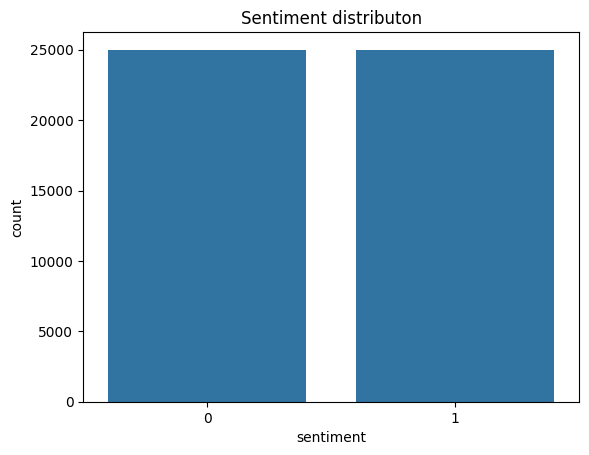

In [ ]:
sns.countplot(data= data, x='sentiment')
plt.title('Sentiment distributon')
plt.show()

In [ ]:
# Create a DataFrame combining both
result_df = pd.DataFrame({
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})

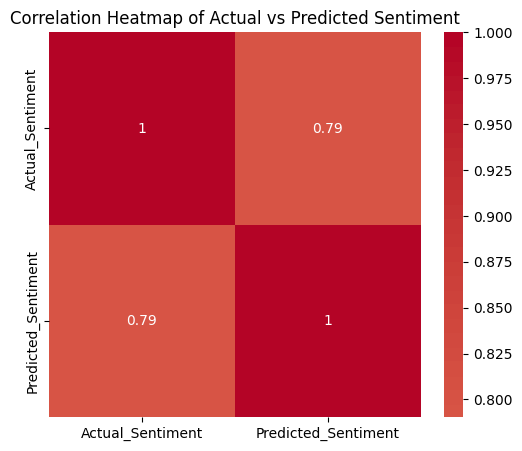

In [ ]:
correlation_matrix = result_df.corr()

# heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Actual vs Predicted Sentiment')
plt.show()


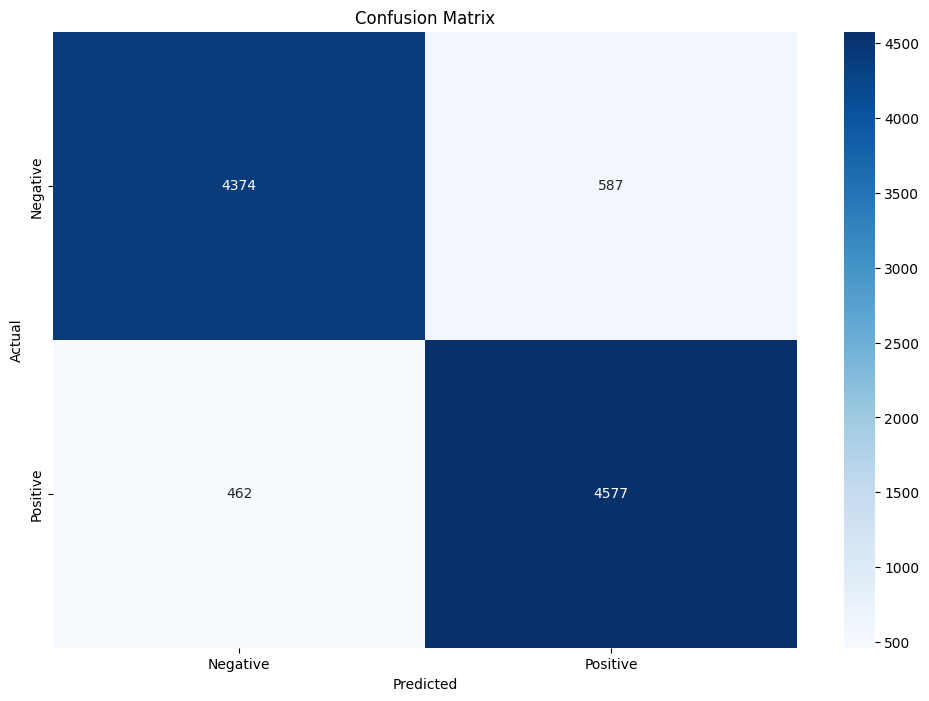

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

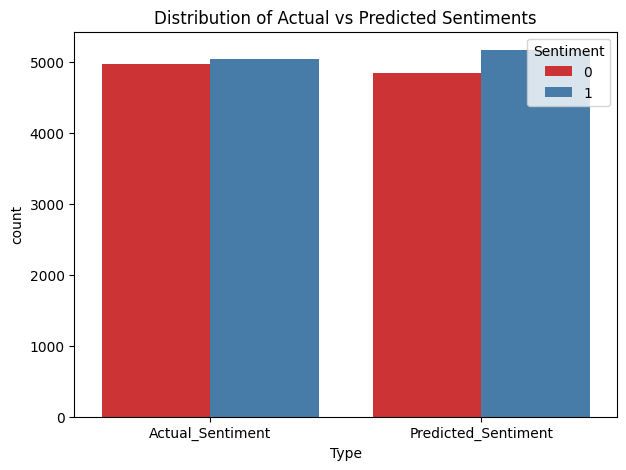

In [ ]:
melted_df = pd.melt(result_df, var_name='Type', value_name='Sentiment')
plt.figure(figsize=(7, 5))
sns.countplot(data=result_df.melt(var_name='Type', value_name='Sentiment'),
              x='Type', hue='Sentiment', palette='Set1')
plt.title('Distribution of Actual vs Predicted Sentiments')
plt.show()


In [ ]:
labels = {1: 'positive', 0: 'negative'}

In [ ]:
movie_reviews = [
    "Absolutely loved the cinematography and acting, a visual masterpiece!",
    "The plot was painfully slow and predictable, couldn't keep me engaged.",
    "A heartwarming story with strong performances, definitely worth watching.",
    "Poor character development and weak dialogue ruined the potential.",
    "An emotional rollercoaster that kept me hooked from start to finish!",
    "Too many clichés and forced humor, felt like a waste of time.",
    "Stunning visuals and a powerful soundtrack made this film unforgettable.",
    "Lacked originality and the pacing was all over the place.",
    "Brilliant direction and a thought-provoking script, a must-watch.",
    "The actors were so damn good. However the story didnt live up",
    "Felt like a low-budget mess with no clear storyline."
]

In [ ]:
custom_movies_reviews_cleaned = [clean_text(review) for review in movie_reviews]
custom_tfidf = vectorizer.transform(custom_movies_reviews_cleaned)
custom_predictions = model.predict(custom_tfidf)
custom_probabilities = model.predict_proba(custom_tfidf)

In [ ]:
for review, sentiment, prob in zip(movie_reviews, custom_predictions, custom_probabilities):
    sentiment_text = labels[sentiment]
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment_text} (Confidence: {prob[sentiment]:.2f})\n")

Review: Absolutely loved the cinematography and acting, a visual masterpiece!
Sentiment: positive (Confidence: 0.95)

Review: The plot was painfully slow and predictable, couldn't keep me engaged.
Sentiment: negative (Confidence: 0.93)

Review: A heartwarming story with strong performances, definitely worth watching.
Sentiment: positive (Confidence: 0.99)

Review: Poor character development and weak dialogue ruined the potential.
Sentiment: negative (Confidence: 1.00)

Review: An emotional rollercoaster that kept me hooked from start to finish!
Sentiment: positive (Confidence: 0.79)

Review: Too many clichés and forced humor, felt like a waste of time.
Sentiment: negative (Confidence: 0.98)

Review: Stunning visuals and a powerful soundtrack made this film unforgettable.
Sentiment: positive (Confidence: 0.97)

Review: Lacked originality and the pacing was all over the place.
Sentiment: negative (Confidence: 0.74)

Review: Brilliant direction and a thought-provoking script, a must-watch